In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import sys
from scipy.optimize import curve_fit, leastsq

%matplotlib inline

### Fetching the data from the files

In [5]:
def create_df(filename):
    df= pd.read_json(filename)
    return df

def filter_data(df):    
    mean = df['price'].mean()
    std = df['price'].std()
    lower_range = mean - 2*std
    upper_range = mean + 2*std
    mask = (df['price'] >= lower_range) & (df['price'] <= upper_range)

    df['price'] = df['price'][mask]
    df['duration'] = df['duration'][mask]

    df['departure'] = pd.to_datetime(df['departure'].str[:10])

    df.index = df['departure']
    return df
    
def sort_by_date(df):
    df2 = pd.DataFrame(index=df.index.unique(), columns=['price'])

    for i in df.index.unique():
        df2.loc[i] = df.loc[i, 'price'].quantile(q=0.25)
    return df2



In [11]:
def hist(df, bin):

    x = df['price']
    fig, ax = plt.subplots(figsize = (12, 6))
    ax.legend(['The price density of flights from BHX to IAS'])
    ax.set_xlabel('price')
    ax.set_ylabel('density')
    ax.set_xticks(np.arange(0, np.max(x)+1, 100))
    ax.hist(x, bins=bin)

In [4]:
df = create_df('file1.json')
df = filter_data(df)
df2 = sort_by_date(df)

In [57]:

y = df2['price']
x = df2.index

x_line= (x - pd.Timestamp("01/01/1970")) // pd.Timedelta('1s')

# Finding the amplitude of the sin waves
amp = abs(np.fft.fft(y))
# Finding the frequency of the sin waves
freq = np.fft.fftfreq(len(x_line), (x_line[1]-x_line[0]))
guess_amp = np.std(y) * 2**0.5
guess_freq = abs(freq[np.argmax(amp[1:])+1])
print(guess_freq)
phase = 0
guess_offset = np.mean(y)
guess = [guess_amp, 2*np.pi*guess_freq, phase,  guess_offset]

1.5129508593560882e-07


### The functions used to make a line of best fit

In [60]:

def sinfunc(x, a, w, p, c):
    return a * np.sin(x*w+p) + c

#def combine_funcs(x_line, y, a, w, p, c):
x_line, y, a, w, p, c=x_line, y, amp, freq*np.pi*2, 0, guess_offset



total = np.zeros(shape=len(x_line))
est_amps = np.empty(len(a))
est_freq = np.empty(len(a))
est_phase = np.empty(len(a))
est_offset = np.empty(len(a))
for i in range(len(a)):
    popt, pcov= curve_fit(sinfunc, x_line, y,  p0 = [a[i], w[i], p, c])
    est_amps[i] = popt[0]
    est_freq[i] = popt[1]
    est_phase[i] = popt[2]
    est_offset[i] = popt[3]
    #total += sinfunc(x_line, popt[0], popt[1], popt[2], 0)

ind = np.argpartition(est_amps, -4)[-4:]
print(ind)
for i in ind:
    print(est_amps[ind])
    total += sinfunc(x_line, est_amps[i], est_freq[i], est_phase[i], est_offset[i])




c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


KeyboardInterrupt: 

In [44]:

#print(guess)
#print(freq)
y_line2 = combine_funcs(x_line, y, amp, freq*np.pi*2, 0, guess_offset)


306
1.5129508593560882e-07
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[304 305 153   0]
[1.81881229e+02 1.81881303e+02 1.94250000e+03 1.92570000e+05]
[1.81881229e+02 1.81881303e+02 1.94250000e+03 1.92570000e+05]
[1.81881229e+02 1.81881303e+02 1.94250000e+03 1.92570000e+05]
[1.81881229e+02 1.81881303e+02 1.94250000e+03 1.92570000e+05]


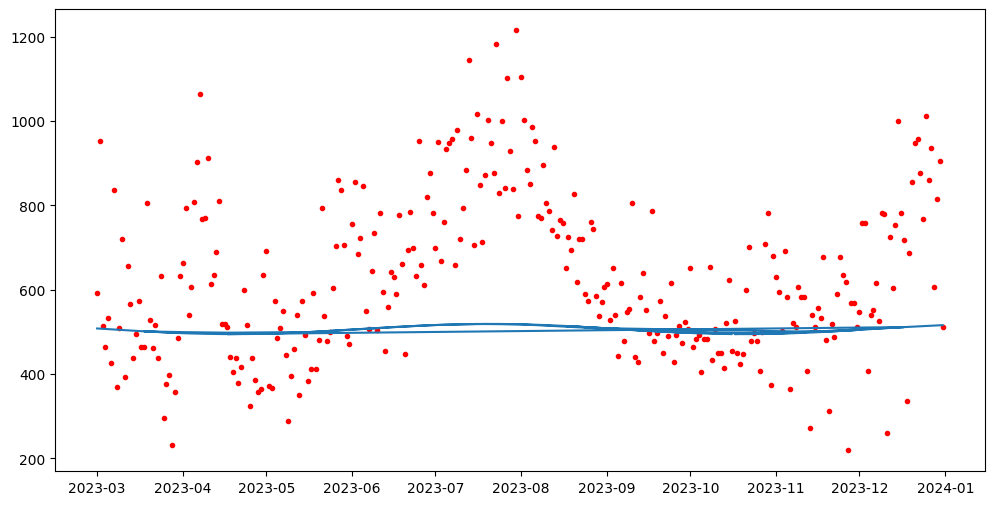

In [50]:

fig, ax = plt.subplots(figsize = (12, 6))
ax.scatter(x, y, color = 'red', marker='.')
ax.plot(x, y_line2/30+400)